In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Combinando os dataframes
df1 = pd.read_csv('dataset/sm_assai_2024_10_09.csv')
df2 = pd.read_csv('dataset/sm_atacadao_2024_10_09.csv')
df3 = pd.read_csv('dataset/sm_bigbox_2024_10_09.csv')
df4 = pd.read_csv('dataset/sm_carrefour_2024_10_09.csv')
df5 = pd.read_csv('dataset/sm_oba_2024_10_09.csv')
df6 = pd.read_csv('dataset/sm_veneza_2024_10_09.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
df = df.drop_duplicates()
# df = df[df['nome'].astype(str).str.contains('filé', case=False)]
df.to_csv('dataset/sm_total.csv', index=False)

In [4]:
df['preco'] = df['preco'].astype(str).str.extract('(\d*\.?\d+)').astype(float)
df[['nome', 'preco', 'gramagem', 'supermarket']]

,nome,preco,gramagem,supermarket
0,CAIXA OITAVADA PIZZA FORNO MERCANTIL MOR,31.90,25 unidades,assai
1,ARROZ BRANCO TIPO 1 BERNARDO,27.90,5kg,assai
2,MISTURA PARA PÃO DE QUEIJO AMAFIL,48.90,5kg,assai
3,LEITE CONDENSADO SEMIDESNATADO TRIÂNGULO MINEIRO,4.99,395g,assai
4,CREME DE LEITE PIRACANJUBA,3.19,200g,assai
...,...,...,...,...
20580,Tomate Extra,1.99,1 kg,veneza
20581,CARNE DE SOL,28.99,1 kg,veneza
20582,COXÃO MOLE,31.99,1 kg,veneza
20583,Repolho ou Chuchu,1.49,1 kg,veneza


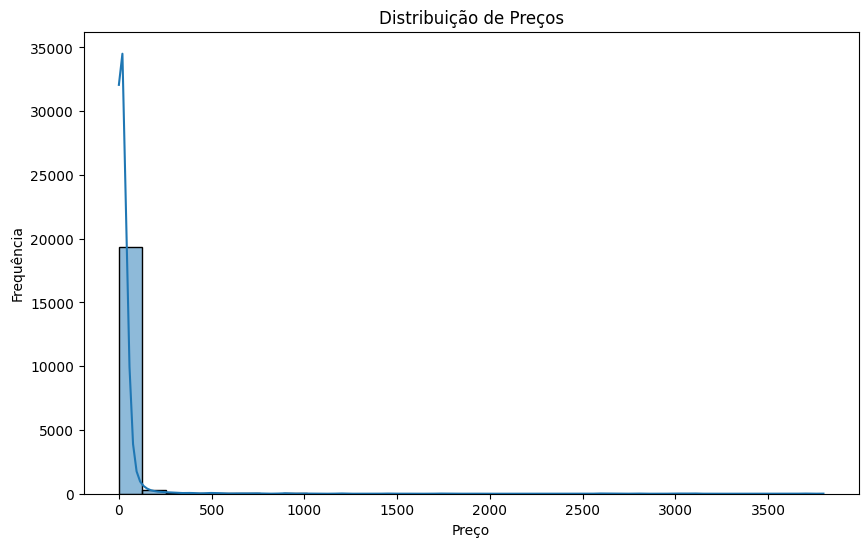

In [5]:
# 1. Distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(df['preco'], bins=30, kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

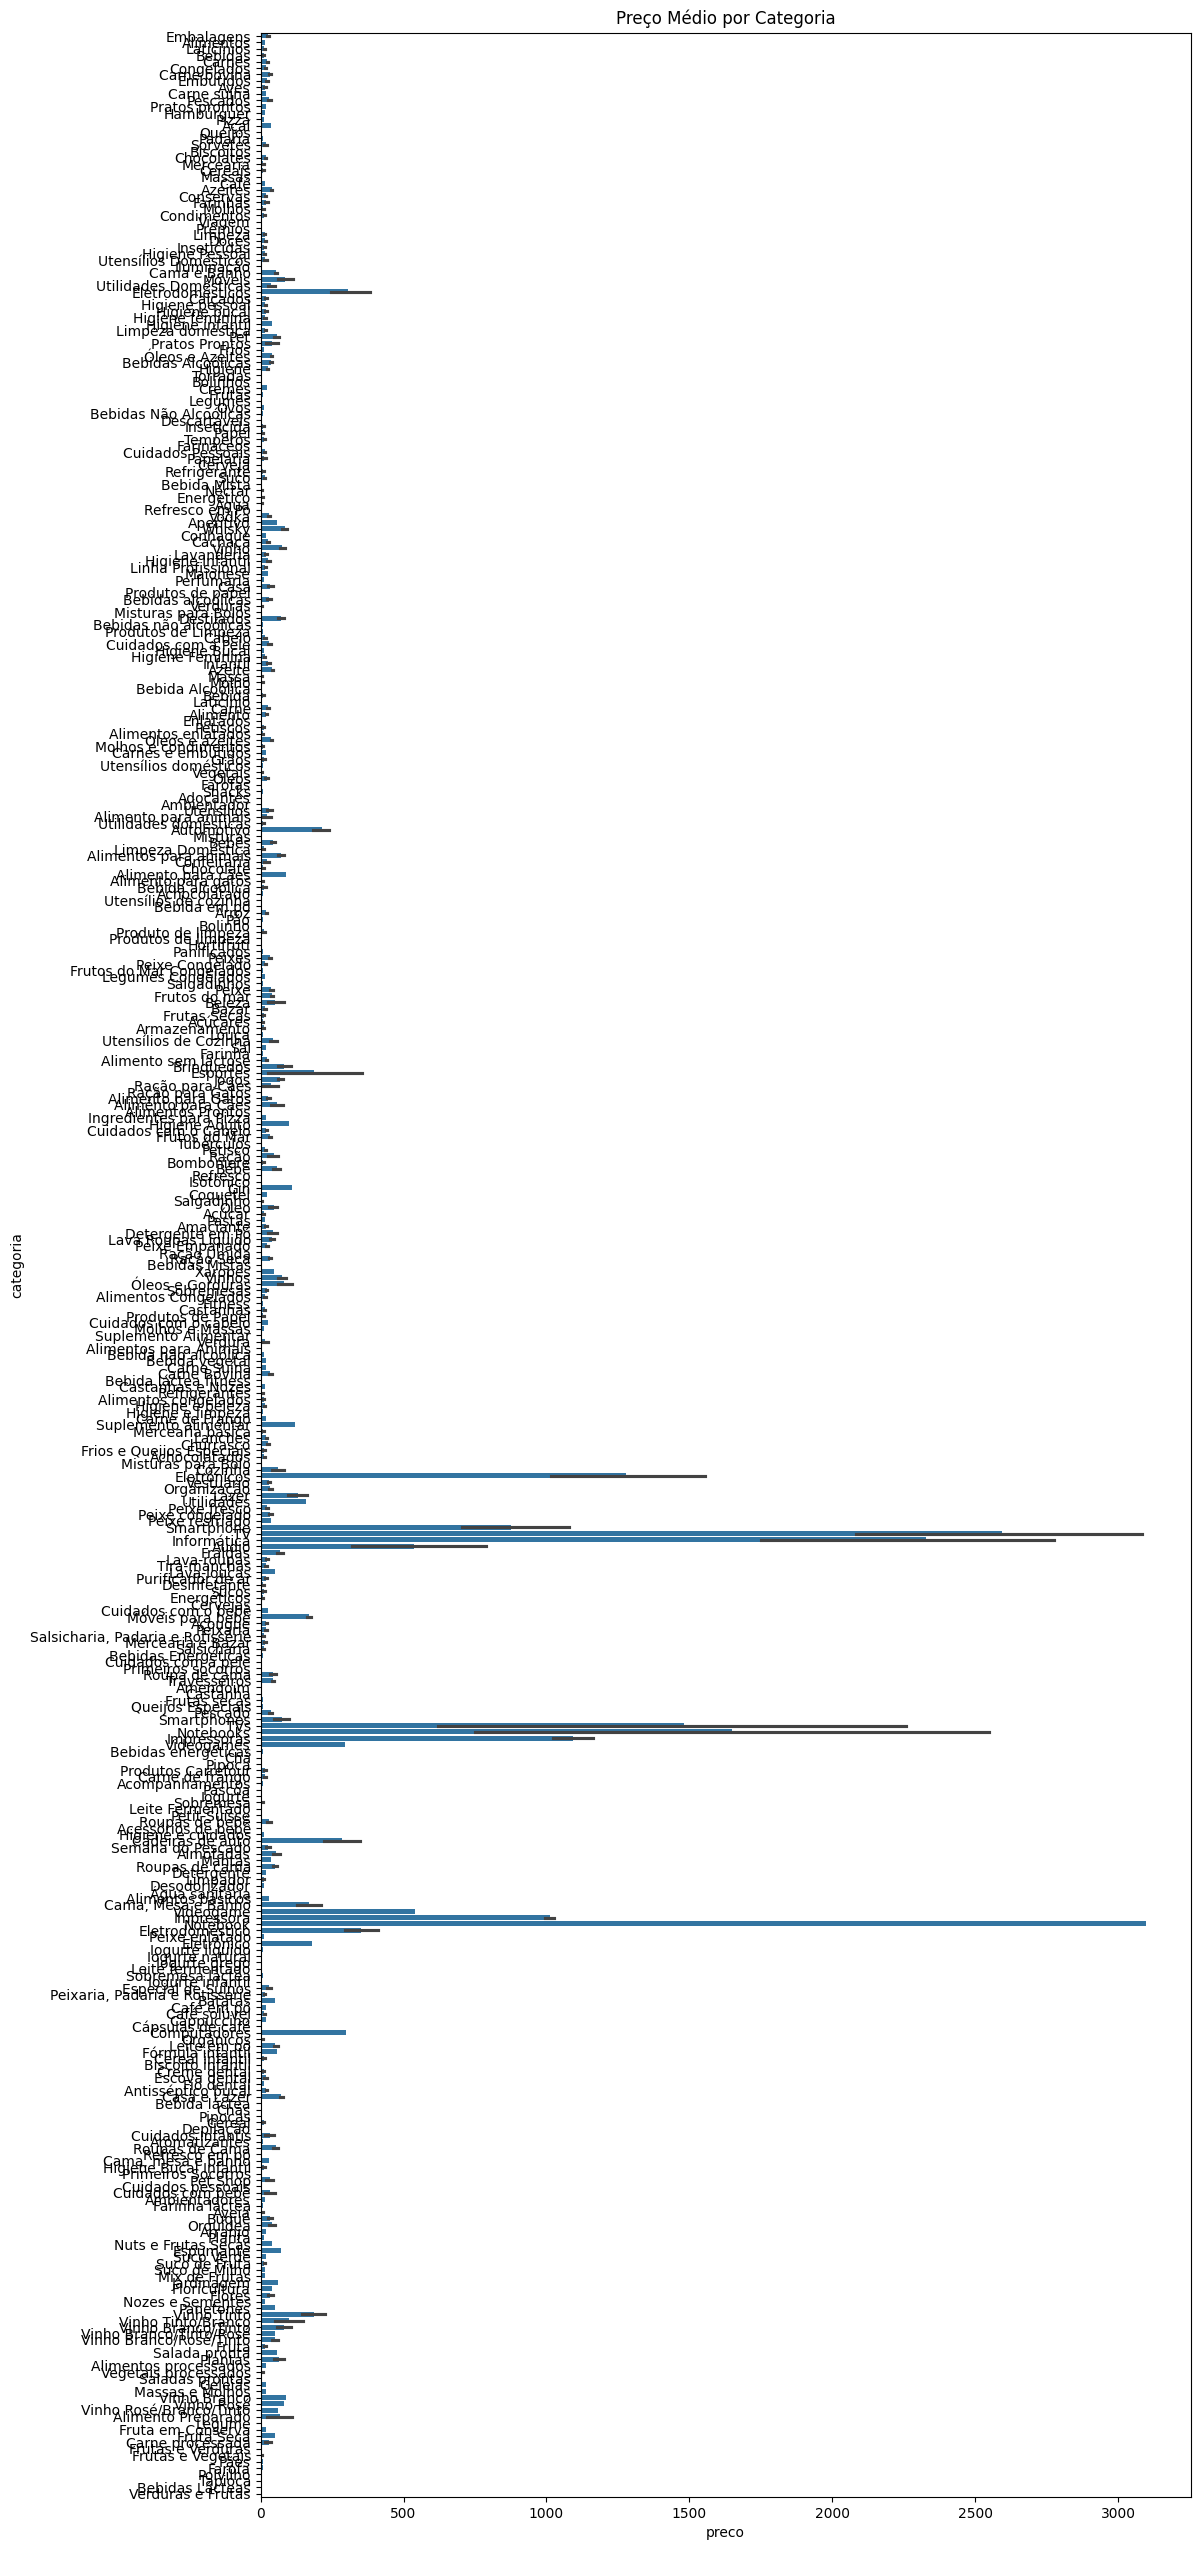

In [6]:
# 2. Preço médio por categoria
plt.figure(figsize=(12, 32))
sns.barplot(x='preco', y='categoria', data=df)
plt.title('Preço Médio por Categoria')
# plt.xticks(rotation=90)
plt.show()

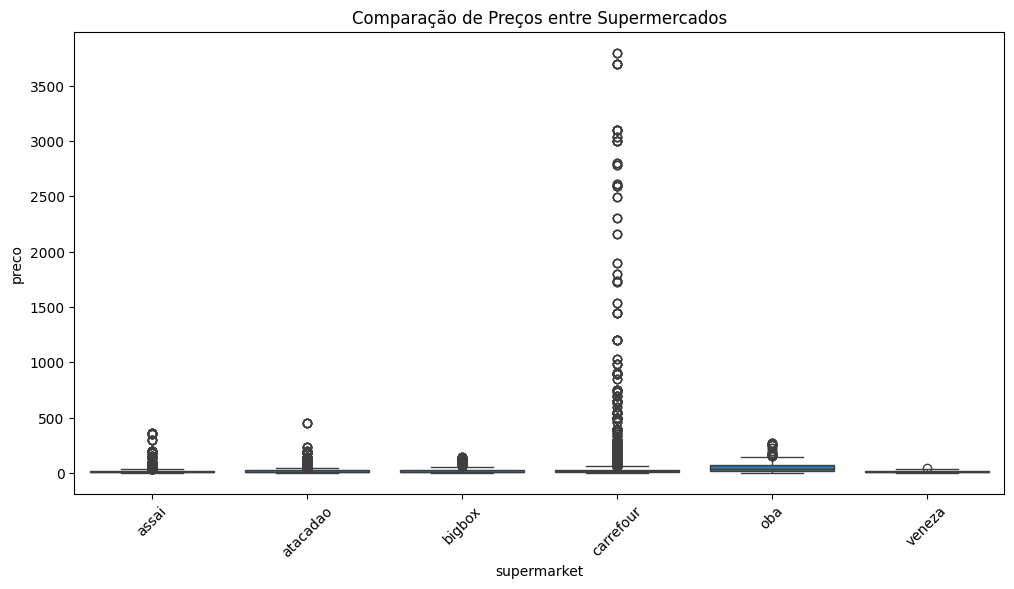

In [7]:
# 3. Comparação de preços entre supermercados
plt.figure(figsize=(12, 6))
sns.boxplot(x='supermarket', y='preco', data=df)
plt.title('Comparação de Preços entre Supermercados')
plt.xticks(rotation=45)
plt.show()

In [8]:
# # 4. Evolução de preços ao longo do tempo
# df['date'] = pd.to_datetime(df['date'])
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='date', y='preco', hue='supermarket', data=df)
# plt.title('Evolução de Preços ao Longo do Tempo')
# plt.xticks(rotation=45)
# plt.show()

In [9]:
# # 5. Proporção de ofertas por supermercado
# offer_prop = df.groupby('supermarket')['oferta'].mean()
# plt.figure(figsize=(10, 6))
# offer_prop.plot(kind='bar')
# plt.title('Proporção de Ofertas por Supermercado')
# plt.ylabel('Proporção de Ofertas')
# plt.xticks(rotation=45)
# plt.show()

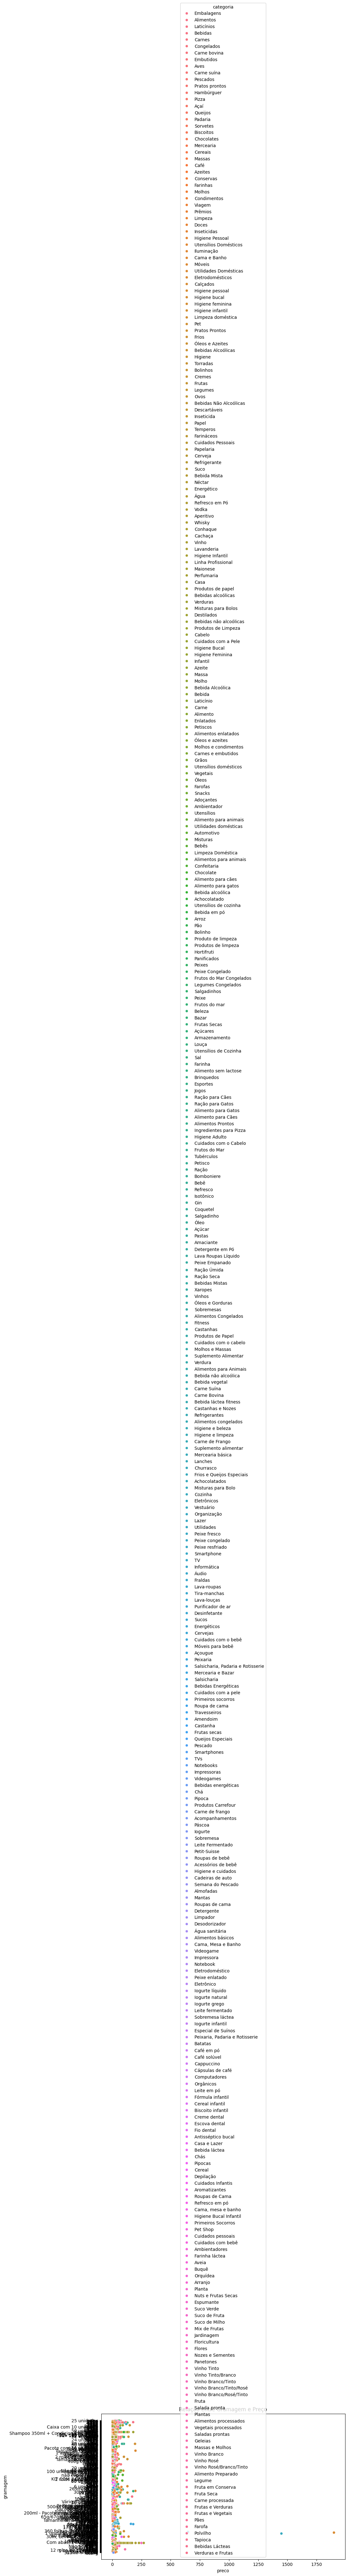

In [10]:
# 6. Relação entre gramagem e preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='preco', y='gramagem', hue='categoria', data=df)
plt.title('Relação entre Gramagem e Preço')
plt.show()

In [11]:
# # 7. Mapa de calor de correlação
# corr = df[['preco', 'gramagem', 'oferta']].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Mapa de Calor de Correlação')
# plt.show()

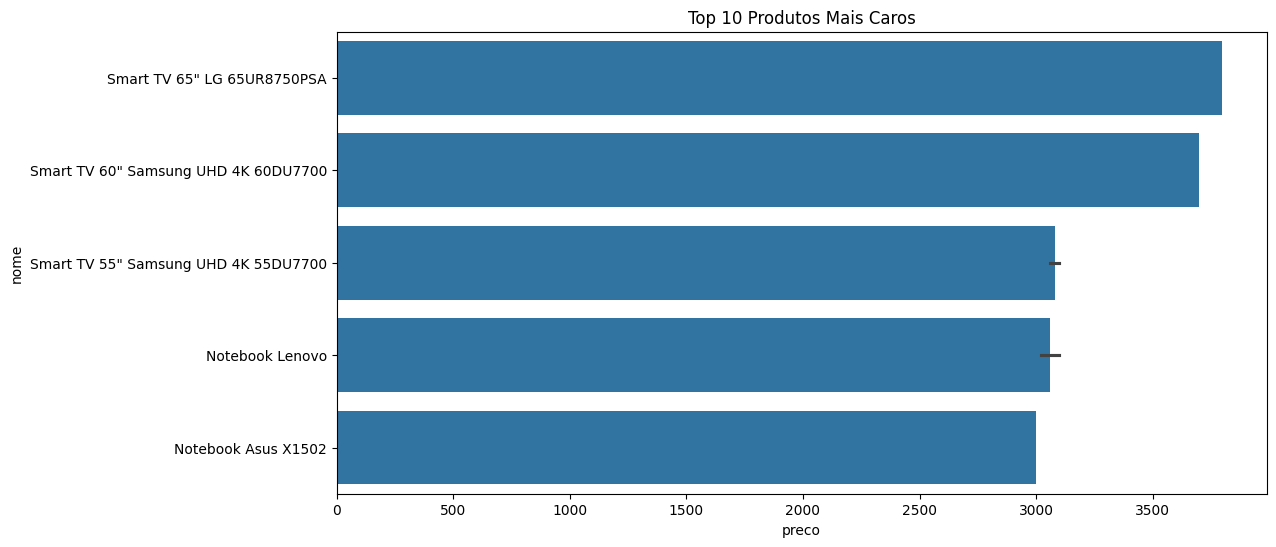

In [12]:
# 8. Top 10 produtos mais caros
top_10_expensive = df.nlargest(25, 'preco')
plt.figure(figsize=(12, 6))
sns.barplot(x='preco', y='nome', data=top_10_expensive)
plt.title('Top 10 Produtos Mais Caros')
# plt.xticks(rotation=90)
plt.show()

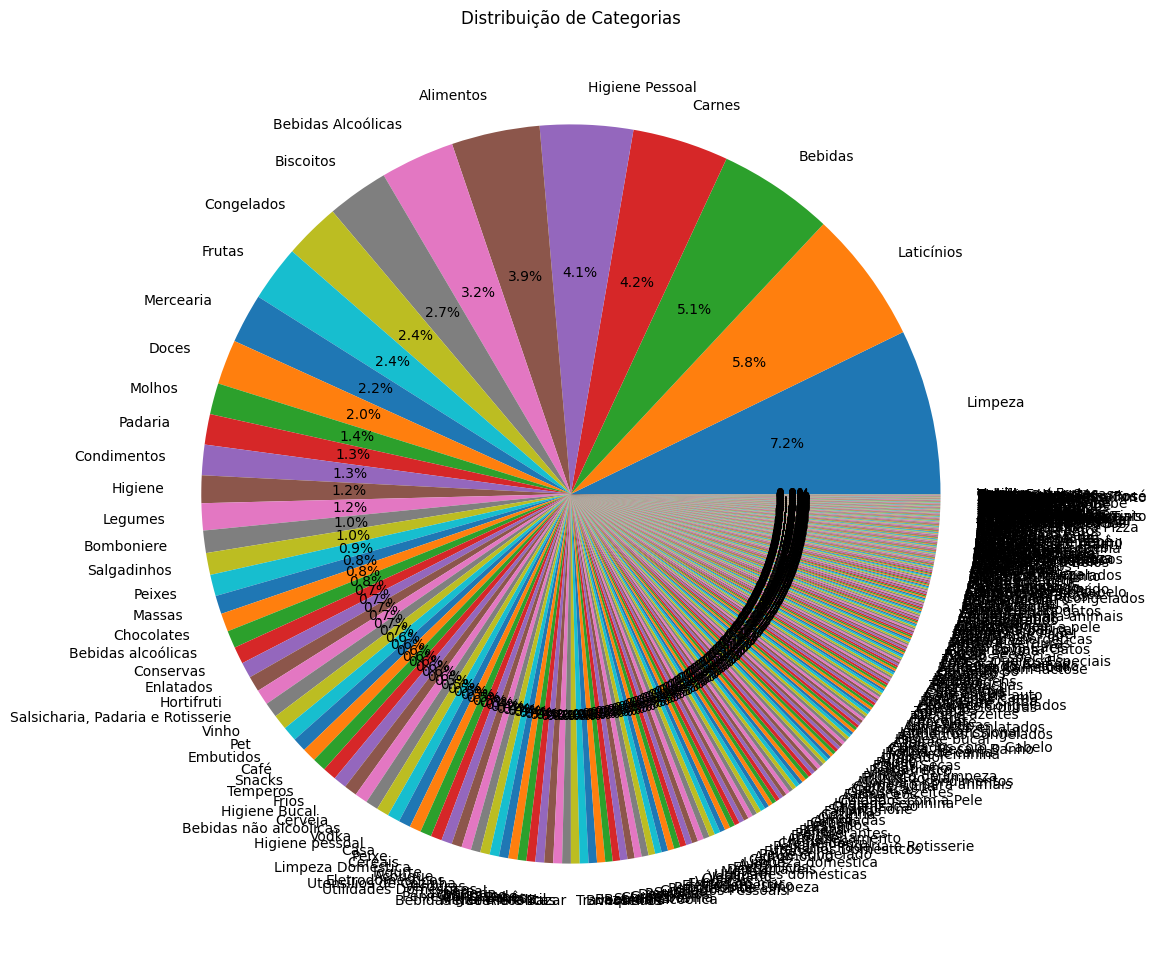

In [13]:
# 9. Distribuição de categorias
plt.figure(figsize=(12, 12))
df['categoria'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Categorias')
plt.ylabel('')
plt.show()